In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/avv-nlp-data/train.csv', encoding='latin-1')

In [3]:
df.sample(5)

,category,sub_category,crimeaditionalinfo
89189,Online Financial Fraud,Internet Banking Related Fraud,Rs ka fraud hua hai\r\nusne pahle hamse ek li...
54045,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,I ordered a pant roadster brand from flipkart ...
43945,Any Other Cyber Crime,Other,Sir this number is mine but I have no whats ap...
7199,Online Financial Fraud,Internet Banking Related Fraud,I got fraud call from then i received kotk ba...
4609,Online Financial Fraud,UPI Related Frauds,caller got call from saying calling from polic...


In [4]:
df = df.dropna(subset=["sub_category"])

In [5]:
df['sub_category'].unique()

array(['Cyber Bullying  Stalking  Sexting', 'Fraud CallVishing',
       'Online Gambling  Betting', 'Online Job Fraud',
       'UPI Related Frauds', 'Internet Banking Related Fraud', 'Other',
       'Profile Hacking Identity Theft',
       'DebitCredit Card FraudSim Swap Fraud', 'EWallet Related Fraud',
       'Data Breach/Theft', 'Cheating by Impersonation',
       'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'FakeImpersonating Profile', 'Cryptocurrency Fraud',
       'Malware Attack', 'Business Email CompromiseEmail Takeover',
       'Email Hacking', 'Hacking/Defacement',
       'Unauthorised AccessData Breach', 'SQL Injection',
       'Provocative Speech for unlawful acts', 'Ransomware Attack',
       'Cyber Terrorism', 'Tampering with computer source documents',
       'DematDepository Fraud', 'Online Trafficking',
       'Online Matrimonial Fraud', 'Website DefacementHacking',
       'Damage to computer computer systems etc', 'Impersonating Email'

In [6]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87095 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            87095 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  87074 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [8]:
# renaming the cols
#df.rename(columns={'v1':'target','v2':'text'},inplace=True)
#df.sample(5)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['sub_category'] = encoder.fit_transform(df['sub_category'])

In [11]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,4,I had continue received random calls and abusi...
1,Online Financial Fraud,15,The above fraudster is continuously messaging ...
2,Online Gambling Betting,21,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,22,In apna Job I have applied for job interview f...
4,Online Financial Fraud,15,I received a call from lady stating that she w...


In [12]:
df = df.dropna(subset=["crimeaditionalinfo"])

In [13]:
# missing values
df.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

5056

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(82018, 3)

# 3. Data Preprocessing


## Lower case
## Tokenization
## Removing special characters
## Removing stop words and punctuation
## Stemming

In [18]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# import string

# # Downloading stopwords if not already done
# nltk.download('stopwords')
# nltk.download('punkt')

# # Initialize resources outside the function
# ps = PorterStemmer()
# stop_words = set(stopwords.words('english'))  # Converting to set for faster lookups
# punctuations = set(string.punctuation)        # Set for punctuation lookup

# def transform_text(text):
#     # Step 1: Lowercasing
#     text = text.lower()
    
#     # Step 2: Tokenization
#     text = nltk.word_tokenize(text)
    
#     # Step 3: Removing stopwords, punctuation, and applying stemming
#     text = [ps.stem(word) for word in text if word.isalnum() and word not in stop_words and word not in punctuations]
    
#     # Step 4: Joining back to string
#     return " ".join(text)

In [19]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords.words('english')
# import string
# string.punctuation


In [20]:
# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# ps.stem('loving')

In [21]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [22]:
import spacy
from tqdm import tqdm
import pandas as pd

# Load the Spacy model for English
nlp = spacy.load('en_core_web_sm')

# Initialize tqdm to work with pandas
tqdm.pandas()

def transform_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

In [23]:
df['transformed_text'] = df['crimeaditionalinfo'].progress_apply(transform_text_spacy)

100%|██████████| 82018/82018 [20:18<00:00, 67.31it/s]


In [24]:
df.head()

,category,sub_category,crimeaditionalinfo,transformed_text
0,Online and Social Media Related Crime,4,I had continue received random calls and abusi...,continue receive random call abusive message w...
1,Online Financial Fraud,15,The above fraudster is continuously messaging ...,fraudster continuously message ask pay money s...
2,Online Gambling Betting,21,He is acting like a police and demanding for m...,act like police demand money add section text ...
3,Online and Social Media Related Crime,22,In apna Job I have applied for job interview f...,apna job apply job interview telecalle resourc...
4,Online Financial Fraud,15,I received a call from lady stating that she w...,receive lady state send new phone vivo receive...


In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

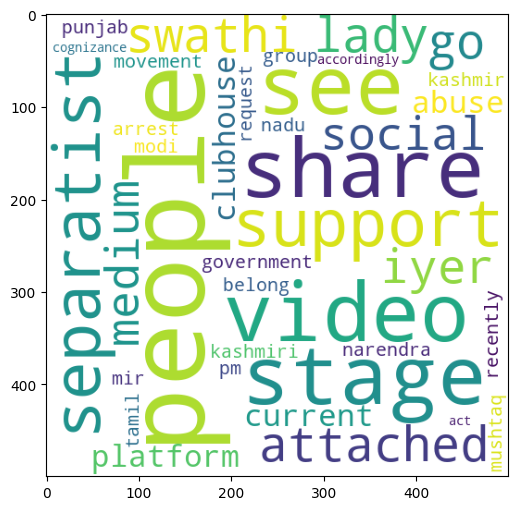

In [27]:
import matplotlib.pyplot as plt
sub_cat_wc = wc.generate(df[df['sub_category'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(sub_cat_wc)

# 4. Model Building

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [30]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [31]:
y = df['sub_category'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [34]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# **MODEL 1**

In [35]:
from sklearn import metrics
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
# Precision, Recall, F1 Score
precision = precision_score(y_test, y_pred1, average='weighted')  # Macro or Micro can be used as well
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')
accuracy = accuracy_score(y_test, y_pred1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.1049
Precision: 0.4223753449294027
Recall: 0.10485247500609607
F1 Score: 0.11971135670355122


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


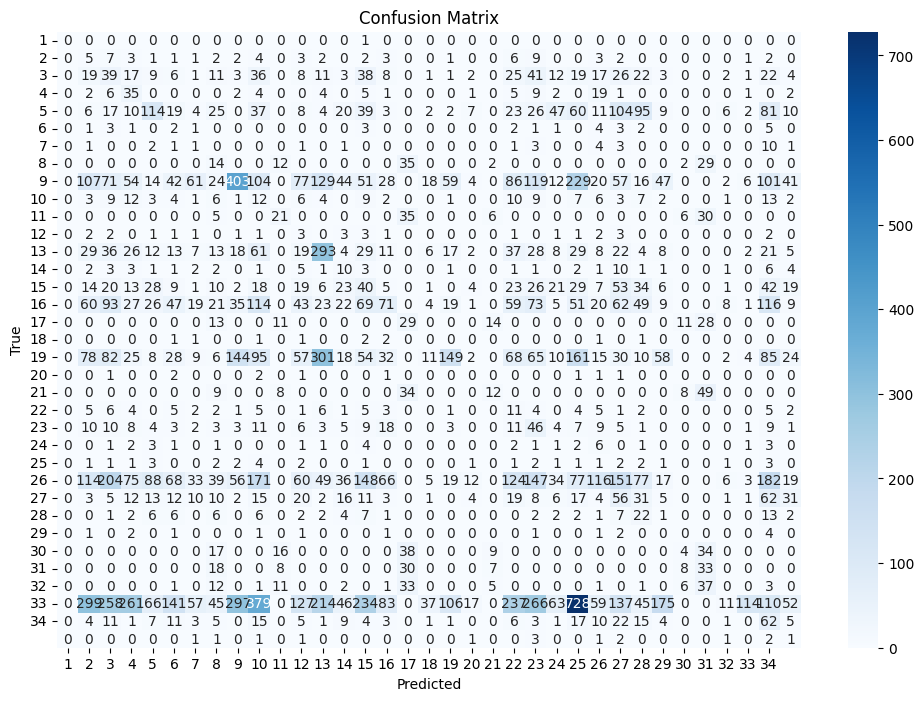

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Precision-Recall or F1 Score per Class for model 1**

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of labels (34).

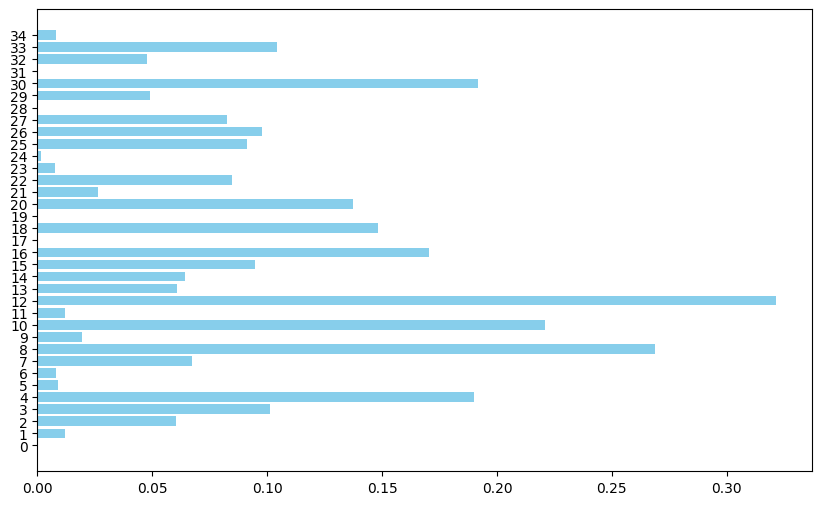

In [44]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1)
categories = gnb.classes_

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(categories)+1), f1, color='skyblue')
plt.yticks(np.arange(len(categories)+1), categories)
plt.xlabel('F1 Score')
plt.title('F1 Score per Class')
plt.show()

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize the output for ROC AUC
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Fit GaussianNB in a One-vs-Rest fashion
classifier = OneVsRestClassifier(GaussianNB())
classifier.fit(X_train, y_binarized[:len(X_train)])

y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[len(X_train):, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each Class')
plt.legend(loc="lower right")
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/multiclass.py:77: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(


# **MODEL 2**

In [37]:
from sklearn import metrics
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
precision = precision_score(y_test, y_pred2, average='weighted')  # Macro or Micro can be used as well
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')
accuracy = accuracy_score(y_test, y_pred2)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.4727
Precision: 0.46614429686627734
Recall: 0.47268958790538895
F1 Score: 0.4417818562167158


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


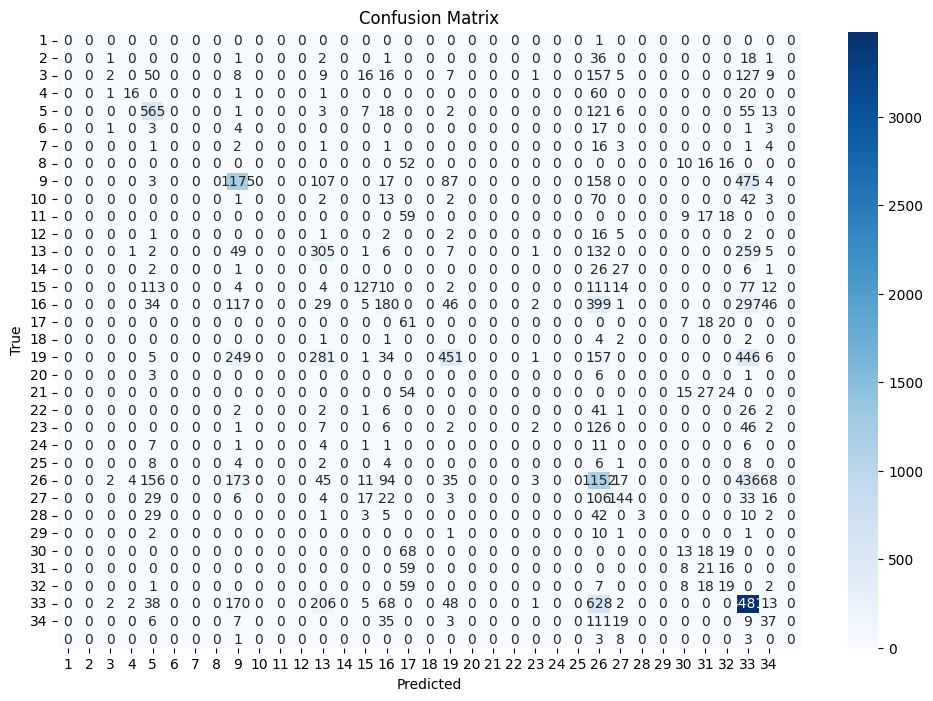

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of labels (34).

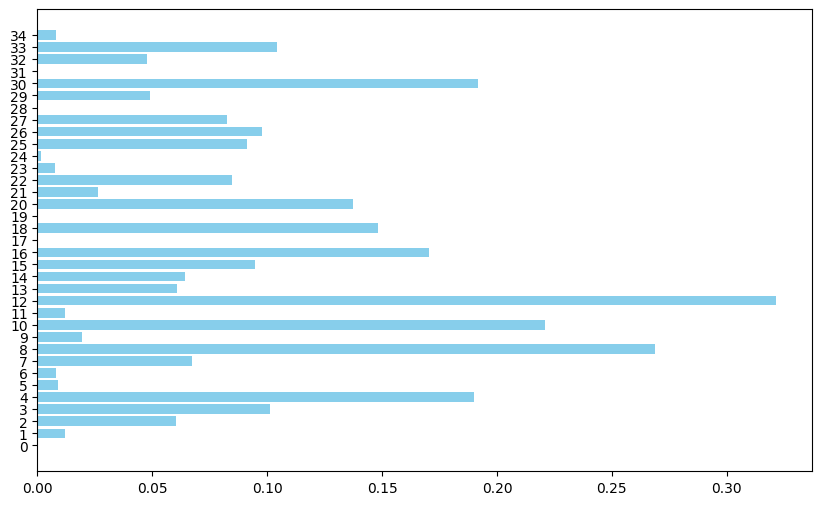

In [45]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1)
categories = mnb.classes_

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(categories)+1), f1, color='skyblue')
plt.yticks(np.arange(len(categories)+1), categories)
plt.xlabel('F1 Score')
plt.title('F1 Score per Class')
plt.show()

# ROC Curves (for each class): for model 2

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize the output for ROC AUC
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Fit GaussianNB in a One-vs-Rest fashion
classifier = OneVsRestClassifier(GaussianNB())
classifier.fit(X_train, y_binarized[:len(X_train)])

y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[len(X_train):, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each Class')
plt.legend(loc="lower right")
plt.show()

# **MODEL 3**

In [39]:
from sklearn import metrics
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
precision = precision_score(y_test, y_pred3, average='weighted')  # Macro or Micro can be used as well
recall = recall_score(y_test, y_pred3, average='weighted')
f1 = f1_score(y_test, y_pred3, average='weighted')
accuracy = accuracy_score(y_test, y_pred3)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.4320
Precision: 0.45234028448000024
Recall: 0.4320287734698854
F1 Score: 0.4242476847063894


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


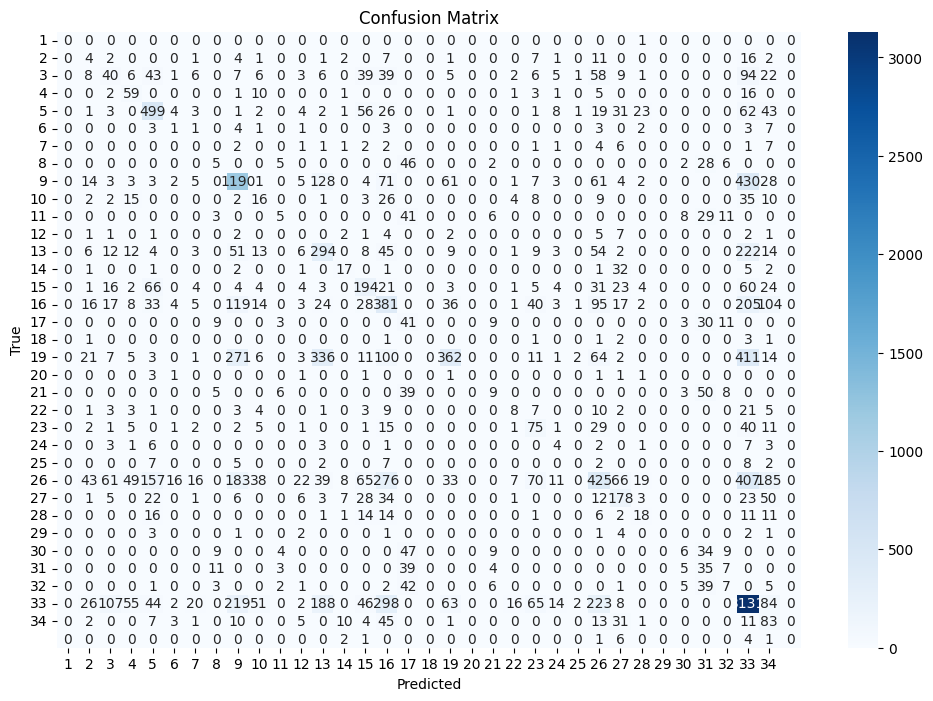

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=bnb.classes_, yticklabels=bnb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: The number of FixedLocator locations (35), usually from a call to set_ticks, does not match the number of labels (34).

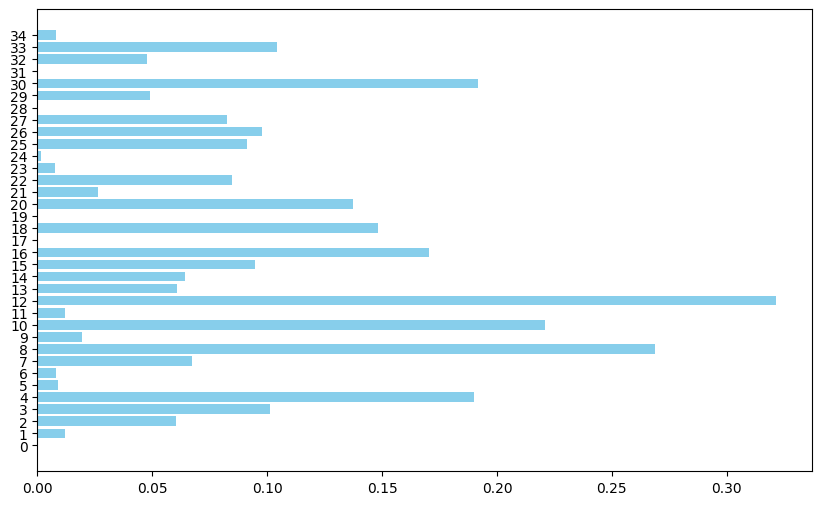

In [46]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred1)
categories = bnb.classes_

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(categories)+1), f1, color='skyblue')
plt.yticks(np.arange(len(categories)+1), categories)
plt.xlabel('F1 Score')
plt.title('F1 Score per Class')
plt.show()

# ROC Curves (for each class): for model 3

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Binarize the output for ROC AUC
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Fit GaussianNB in a One-vs-Rest fashion
classifier = OneVsRestClassifier(GaussianNB())
classifier.fit(X_train, y_binarized[:len(X_train)])

y_score = classifier.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[len(X_train):, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for each Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')  # Macro or Micro can be used as well
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,precision,recall,f1

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 Score - ",current_f1)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1 Score':f1_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

In [ ]:
sns.relplot(x = 'Algorithm', y='value', kind='line', height=6,  hue = 'variable',data=performance_df1)
plt.ylim(0.82,1.005)
plt.xticks(rotation='vertical')
plt.show()

# **AS OF NOW RUN TILL HERE**

In [82]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

ValueError: All arrays must be of the same length

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

ValueError: All arrays must be of the same length

In [85]:
new_df = performance_df.merge(temp_df,on='Algorithm')

NameError: name 'performance_df' is not defined

In [86]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

NameError: name 'new_df' is not defined

In [87]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

ValueError: All arrays must be of the same length

In [88]:
new_df_scaled.merge(temp_df,on='Algorithm')

NameError: name 'new_df_scaled' is not defined

In [89]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [90]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [91]:
voting.fit(X_train,y_train)
mnb.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [92]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'X_test' is not defined

In [93]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier

In [95]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [96]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

NameError: name 'X_train' is not defined

In [97]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))